In [1]:
import pandas as pd # Pandas for data reading and manipulation

# Importing Fraud Dataset
path = '/Users/quentinjonneaux/Desktop/ Experiment/Coursera/financial_transactions_dataset.csv'

df=pd.read_csv(path)

# Display dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     20000 non-null  int64  
 1   timestamp          20000 non-null  object 
 2   amount             20000 non-null  float64
 3   currency           20000 non-null  object 
 4   merchant_name      20000 non-null  object 
 5   merchant_category  20000 non-null  object 
 6   card_type          20000 non-null  object 
 7   location_city      20000 non-null  object 
 8   location_country   20000 non-null  object 
 9   latitude           20000 non-null  float64
 10  longitude          20000 non-null  float64
 11  is_fraud           20000 non-null  int64  
dtypes: float64(3), int64(2), object(7)
memory usage: 1.8+ MB


In [2]:
# Feature Engineering

# Defining features and targets
features = df.drop('is_fraud',axis=1)
target = df['is_fraud']

# Transaction times
# Converting to series to datetime object
features['timestamp'] = pd.to_datetime(features['timestamp'])

# Creating variable for year as integer
features['trans_date_year'] = features['timestamp'].dt.strftime('%Y')
features['trans_date_year'] = features['trans_date_year'].astype(int)

# Creating variable for month as integer
features['trans_date_month'] = features['timestamp'].dt.strftime('%m')
features['trans_date_month'] = features['trans_date_month'].astype(int)

# Creating variable for day as integer
features['trans_date_day'] = features['timestamp'].dt.strftime('%d')
features['trans_date_day'] = features['trans_date_day'].astype(int)

# Creating variable for hour as integer
features['trans_date_hour'] = features['timestamp'].dt.strftime('%H')
features['trans_date_hour'] = features['trans_date_hour'].astype(int)

# Creating variable for minute as integer
features['trans_date_minute'] = features['timestamp'].dt.strftime('%M')
features['trans_date_minute'] = features['trans_date_minute'].astype(int)

# Creating variable for second as integer
features['trans_date_second'] = features['timestamp'].dt.strftime('%S')
features['trans_date_second'] = features['trans_date_second'].astype(int)

# Dropping timestamp variable
features=features.drop('timestamp',axis=1)

# Replace
#get all categorical columns
cat_columns = features.select_dtypes(['object']).columns

#convert all categorical columns to numeric
features[cat_columns] = features[cat_columns].apply(lambda x: pd.factorize(x)[0])

# dropping Trans_num (only used for tracking)
features=features.drop('transaction_id',axis=1)


print('preprocessing done')

preprocessing done


In [3]:
from sklearn import neighbors # Scikit Learn neighbors for creating a KNN

# Create a KNN instance with 4 neighbours
clf = neighbors.KNeighborsClassifier(n_neighbors=4, metric='minkowski')

training done
predictions done
Confusion matrix:  [[3938    1]
 [  26   35]]
Accuracy score:  0.99325


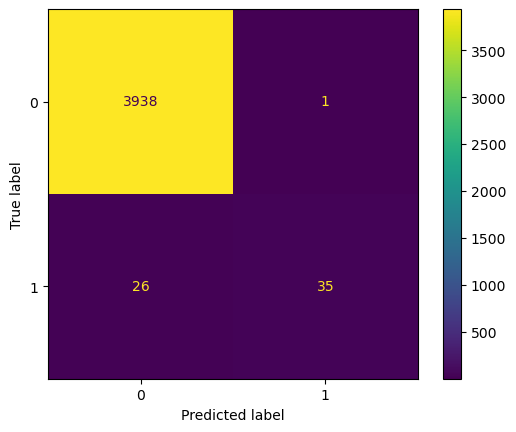

In [4]:
from sklearn import metrics # Scikit Learn metrics for computing confusion matrices and accuracy scores
from sklearn import model_selection # Scikit Learn model_selection to apply K-Fold cross validation
import matplotlib.pyplot as plt # matplotlib.pyplot to display plots

# Split set into training set (80% of data) and test set (20% of data) with n sample of data
test_features, train_features, test_labels, train_labels = model_selection.train_test_split(features,
                                                                                            target,
                                                                                            test_size=0.8,
                                                                                            random_state=0,
                                                                                            stratify=target)

clf.fit(train_features, train_labels)
print('training done')
preds = clf.predict(test_features)
print('predictions done')
confusion_matrix = metrics.confusion_matrix(test_labels, preds)
print('Confusion matrix: ',confusion_matrix)
accuracy = metrics.accuracy_score(test_labels, preds)
print('Accuracy score: ',accuracy)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [5]:
from sklearn import linear_model # Scikit Learn linear model for creating a Perceptron

# Create a Perceptron instance
clf = linear_model.Perceptron()

training done
predictions done
Confusion matrix:  [[3938    1]
 [  23   38]]
Accuracy score:  0.994


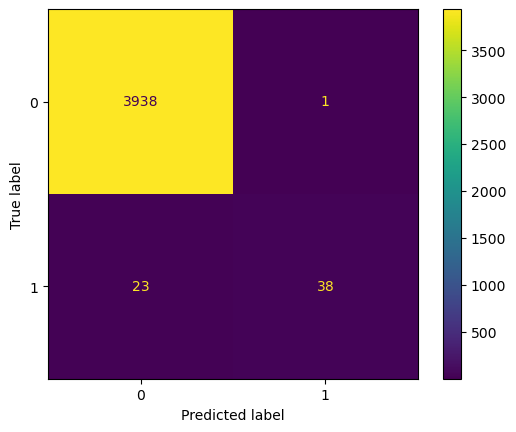

In [6]:
from sklearn import metrics # Scikit Learn metrics for computing confusion matrices and accuracy scores
from sklearn import model_selection # Scikit Learn model_selection to apply K-Fold cross validation
import matplotlib.pyplot as plt # matplotlib.pyplot to display plots


# Split set into training set (80% of data) and test set (20% of data) with n sample of data
test_features, train_features, test_labels, train_labels = model_selection.train_test_split(features,
                                                                                            target,
                                                                                            test_size=0.8,
                                                                                            random_state=0,
                                                                                            stratify=target)

clf.fit(train_features, train_labels)
print('training done')
preds = clf.predict(test_features)
print('predictions done')
confusion_matrix = metrics.confusion_matrix(test_labels, preds)
print('Confusion matrix: ',confusion_matrix)
accuracy = metrics.accuracy_score(test_labels, preds)
print('Accuracy score: ',accuracy)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [7]:
from sklearn import tree # Scikit Learn tree for creating a decision tree

# Create a Decision Tree Instance
clf = tree.DecisionTreeClassifier()

training done
predictions done
Confusion matrix:  [[3933    6]
 [   4   57]]
Accuracy score:  0.9975


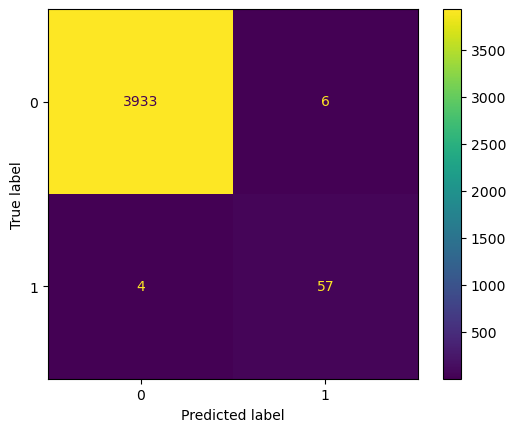

In [8]:
from sklearn import metrics # Scikit Learn metrics for computing confusion matrices and accuracy scores
from sklearn import model_selection # Scikit Learn model_selection to apply K-Fold cross validation
import matplotlib.pyplot as plt # matplotlib.pyplot to display plots


# Split set into training set (80% of data) and test set (20% of data) with n sample of data
test_features, train_features, test_labels, train_labels = model_selection.train_test_split(features,
                                                                                            target,
                                                                                            test_size=0.8,
                                                                                            random_state=0,
                                                                                            stratify=target)

clf.fit(train_features, train_labels)
print('training done')
preds = clf.predict(test_features)
print('predictions done')
confusion_matrix = metrics.confusion_matrix(test_labels, preds)
print('Confusion matrix: ',confusion_matrix)
accuracy = metrics.accuracy_score(test_labels, preds)
print('Accuracy score: ',accuracy)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [9]:
from sklearn import svm # Scikit Learn svm for creating a support vector machine

# Create a SVM instance with a gamme parameter of 1e-6
clf = svm.SVC(gamma=float(1e-6))

training done
predictions done
Confusion matrix:  [[3939    0]
 [  30   31]]
Accuracy score:  0.9925


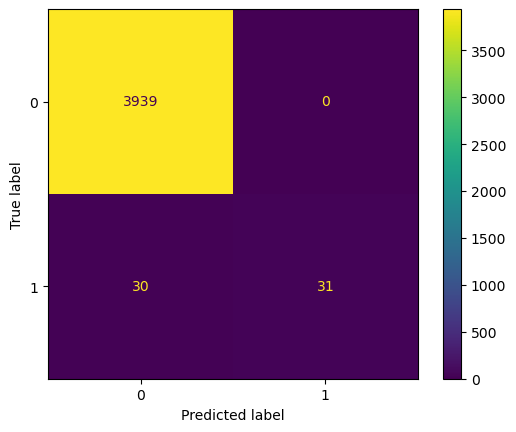

In [10]:
from sklearn import metrics # Scikit Learn metrics for computing confusion matrices and accuracy scores
from sklearn import model_selection # Scikit Learn model_selection to apply K-Fold cross validation
import matplotlib.pyplot as plt # matplotlib.pyplot to display plots


# Split set into training set (80% of data) and test set (20% of data) with n sample of data
test_features, train_features, test_labels, train_labels = model_selection.train_test_split(features,
                                                                                            target,
                                                                                            test_size=0.8,
                                                                                            random_state=0,
                                                                                            stratify=target)

clf.fit(train_features, train_labels)
print('training done')
preds = clf.predict(test_features)
print('predictions done')
confusion_matrix = metrics.confusion_matrix(test_labels, preds)
print('Confusion matrix: ',confusion_matrix)
accuracy = metrics.accuracy_score(test_labels, preds)
print('Accuracy score: ',accuracy)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                              display_labels=clf.classes_)
disp.plot()
plt.show()

In [11]:
# Best Classifier is Decision Tree

clf = tree.DecisionTreeClassifier()
clf.fit(features, target)

DecisionTreeClassifier()

In [12]:
# Importing Test Fraud Dataset
path = '/Users/quentinjonneaux/Desktop/ Experiment/Coursera/Test.csv'

test_df=pd.read_csv(path)

# Display dataset info
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_id     50 non-null     object 
 1   timestamp          50 non-null     object 
 2   amount             50 non-null     float64
 3   currency           50 non-null     object 
 4   merchant_name      50 non-null     object 
 5   merchant_category  50 non-null     object 
 6   card_type          50 non-null     object 
 7   location_city      50 non-null     object 
 8   location_country   50 non-null     object 
 9   latitude           50 non-null     float64
 10  longitude          50 non-null     float64
dtypes: float64(3), object(8)
memory usage: 4.4+ KB


In [13]:
def predict_fraud(test_df):
    """
    A fraud detection ML model.
    """
    processed_df = test_df
    # Feature Engineering

    # Transaction times
    # Converting to series to datetime object
    processed_df['timestamp'] = pd.to_datetime(processed_df['timestamp'])

    # Creating variable for year as integer
    processed_df['trans_date_year'] = processed_df['timestamp'].dt.strftime('%Y')
    processed_df['trans_date_year'] = processed_df['trans_date_year'].astype(int)

    # Creating variable for month as integer
    processed_df['trans_date_month'] = processed_df['timestamp'].dt.strftime('%m')
    processed_df['trans_date_month'] = processed_df['trans_date_month'].astype(int)

    # Creating variable for day as integer
    processed_df['trans_date_day'] = processed_df['timestamp'].dt.strftime('%d')
    processed_df['trans_date_day'] = processed_df['trans_date_day'].astype(int)

    # Creating variable for hour as integer
    processed_df['trans_date_hour'] = processed_df['timestamp'].dt.strftime('%H')
    processed_df['trans_date_hour'] = processed_df['trans_date_hour'].astype(int)

    # Creating variable for minute as integer
    processed_df['trans_date_minute'] = processed_df['timestamp'].dt.strftime('%M')
    processed_df['trans_date_minute'] = processed_df['trans_date_minute'].astype(int)

    # Creating variable for second as integer
    processed_df['trans_date_second'] = processed_df['timestamp'].dt.strftime('%S')
    processed_df['trans_date_second'] = processed_df['trans_date_second'].astype(int)

    # Dropping timestamp variable
    processed_df=processed_df.drop('timestamp',axis=1)

    # Replace
    #get all categorical columns
    cat_columns = processed_df.select_dtypes(['object']).columns

    #convert all categorical columns to numeric
    processed_df[cat_columns] = processed_df[cat_columns].apply(lambda x: pd.factorize(x)[0])

    # dropping Trans_num (only used for tracking)
    processed_df=processed_df.drop('transaction_id',axis=1)


    print('preprocessing done')
    # Predict Fraud
    
    preds = clf.predict(processed_df)
    test_df['flagged']=preds
    #processed_df['flagged']=preds
    #col=test_df['transaction_id']
    #processed_df.insert(0, 'transaction_id', col)
    return test_df

In [14]:
def compliance_workflow(test_df):
    """
    The compliance workflow that checks each transaction.
    """
    processed_df = predict_fraud(test_df)
    flagged_transactions = processed_df[processed_df['flagged']==1]
    print(flagged_transactions)
    return flagged_transactions

In [15]:
import datetime

def generate_report(flagged_transactions):
    """
    Generates a report of flagged transactions.
    """
    print("--- Fraud Detection Report ---")
    print(f"Report generated on: {datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    print(f"\nTotal flagged transactions: {len(flagged_transactions)}")
    print("---------------------------------")

    if len(flagged_transactions) == 0:
        print("\nNo suspicious transactions detected.")
    else:
        print("\nFlagged Transactions:\n")
        for index, row in flagged_transactions.iterrows():
            print(f"  Transaction ID: {row['transaction_id']}")
            print(f"  Timestamp: {row['timestamp']}")
            print(f"  Amount: {row['amount']} {row['currency']}")
            print(f"  Merchant: {row['merchant_name']}")
            print(f"  Action Taken: Flagged for review")
            print("  --------------------")


In [16]:
# --- Execute the Workflow ---
flagged = compliance_workflow(test_df)
print(flagged)

preprocessing done
   transaction_id           timestamp   amount currency     merchant_name  \
0           txn_1 2025-11-01 10:25:00   150.75      USD      Gadget World   
2           txn_3 2025-11-01 10:32:00   800.00      GBP           FlyAway   
3           txn_4 2025-11-01 10:35:00   250.20      USD      Tech Central   
6           txn_7 2025-11-01 10:50:00   500.00      USD  Holiday Planners   
8           txn_9 2025-11-01 11:00:00   300.50      USD      ElectroGoods   
10         txn_11 2025-11-01 11:10:00   600.00      EUR      Global Tours   
14         txn_15 2025-11-01 11:30:00   900.25      USD           FlyAway   
18         txn_19 2025-11-01 11:50:00   450.70      EUR  Holiday Planners   
20         txn_21 2025-11-01 12:00:00   320.80      USD      ElectroGoods   
25         txn_26 2025-11-01 12:25:00   950.00      USD           FlyAway   
29         txn_30 2025-11-01 12:45:00   480.00      EUR  Holiday Planners   
31         txn_32 2025-11-01 12:55:00   340.00      USD  

In [17]:
# --- Generate the Report ---
generate_report(flagged)

--- Fraud Detection Report ---
Report generated on: 2025-11-30 21:49:08

Total flagged transactions: 18
---------------------------------

Flagged Transactions:

  Transaction ID: txn_1
  Timestamp: 2025-11-01 10:25:00
  Amount: 150.75 USD
  Merchant: Gadget World
  Action Taken: Flagged for review
  --------------------
  Transaction ID: txn_3
  Timestamp: 2025-11-01 10:32:00
  Amount: 800.0 GBP
  Merchant: FlyAway
  Action Taken: Flagged for review
  --------------------
  Transaction ID: txn_4
  Timestamp: 2025-11-01 10:35:00
  Amount: 250.2 USD
  Merchant: Tech Central
  Action Taken: Flagged for review
  --------------------
  Transaction ID: txn_7
  Timestamp: 2025-11-01 10:50:00
  Amount: 500.0 USD
  Merchant: Holiday Planners
  Action Taken: Flagged for review
  --------------------
  Transaction ID: txn_9
  Timestamp: 2025-11-01 11:00:00
  Amount: 300.5 USD
  Merchant: ElectroGoods
  Action Taken: Flagged for review
  --------------------
  Transaction ID: txn_11
  Timestamp: 